# Introduction to pandas for finance research

Prepared by [Vincent Grégoire](http://www.vincentgregoire.com), Department of Finance, The University of Melbourne. 

This notebook was created as supplemental material to a Python for financial research bootcamp for finance honours and PhD students at the University of Melbourne in March of 2017.

Last update: March 22, 2017.

**Contact**: <vincent.gregoire@unimelb.edu.au>

Latest version: <http://www.vincentgregoire.com/python-bootcamp/>

Probably the best reference to supplement this material is the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/index.html).

In [1]:
# I usually begin by setting the matplotlib backend for the current notebook.
# You would skip this if you were using Spyder instead of Jupyter.
# This is called a "magic" command (all magic commands begin with %) and is
# not true python code, it is a command that is interpreted by IPython.
%matplotlib inline
# You could also drop the "inline" bit and let IPython pick the matplotlib backend.

In [2]:
# Next I import all the packages needed.

# pandas is the package for panel data analysis.
import pandas as pd
# Numpy is a big numerical package that is used by pandas.
# We don't need to import it in order to use pandas, but we'll use it
# to compute logs.
import numpy as np
# matplotlib is the plotting package.
import matplotlib
import matplotlib.pyplot as plt
# This is optional, but you can set a specific style for plots.
plt.style.use('seaborn')

In [3]:
print( 'Pandas version: ' + str(pd.__version__))
print( 'Numpy version: ' + str(np.__version__))
print( 'Matplotlib version: ' + str(matplotlib.__version__))

Pandas version: 0.19.2
Numpy version: 1.12.0
Matplotlib version: 2.0.0


In this notebook, we will load, merge and analyze stock market data from Yahoo Finance. I have already downloaded historical data for Apple (`AAPL`), Microsoft (`MSFT`), and Alphabet (`GOOG`) from the Yahoo website in CSV format.

For example the data for `GOOG` can be downloaded at <http://finance.yahoo.com/quote/GOOG/history?p=GOOG>.

Note that in this case we are only using a few stocks, so manually downloading the files makes sense. If we were to use more stocks, we could automate this task using the [yahoo-finance](https://github.com/lukaszbanasiak/yahoo-finance) python package.


Let's start by loading the AAPL data, assuming the file name is `AAPL.csv` and is 
located in a data subdirectory.

The new object is what we call a pandas `DataFrame`. The suffix `_df` is not required,
but it helps identify that it represents a DataFrame.


In [4]:
aapl_df = pd.read_csv('data/AAPL.csv')

# Print out a summary of the data
aapl_df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2017-03-20,140.399994,141.500000,140.229996,141.460007,20213100,141.460007
1,2017-03-17,141.000000,141.000000,139.889999,139.990005,43597400,139.990005
2,2017-03-16,140.720001,141.020004,140.259995,140.690002,19132500,140.690002
3,2017-03-15,139.410004,140.750000,139.029999,140.460007,25566800,140.460007
4,2017-03-14,139.300003,139.649994,138.839996,138.990005,15189700,138.990005
5,2017-03-13,138.850006,139.429993,138.820007,139.199997,17042400,139.199997
6,2017-03-10,139.250000,139.360001,138.639999,139.139999,19488000,139.139999
7,2017-03-09,138.740005,138.789993,137.050003,138.679993,22065200,138.679993
8,2017-03-08,138.949997,139.800003,138.820007,139.000000,18681800,139.000000
9,2017-03-07,139.059998,139.979996,138.789993,139.520004,17267500,139.520004


We could look at a smaller sample using the `head()` or `tail()` methods.

In [5]:
aapl_df.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2017-03-20,140.399994,141.500000,140.229996,141.460007,20213100,141.460007
1,2017-03-17,141.000000,141.000000,139.889999,139.990005,43597400,139.990005
2,2017-03-16,140.720001,141.020004,140.259995,140.690002,19132500,140.690002
3,2017-03-15,139.410004,140.750000,139.029999,140.460007,25566800,140.460007
4,2017-03-14,139.300003,139.649994,138.839996,138.990005,15189700,138.990005


In [6]:
aapl_df.tail(5)

,Date,Open,High,Low,Close,Volume,Adj Close
247,2016-03-28,106.000000,106.190002,105.059998,105.190002,19411400,103.012296
248,2016-03-24,105.470001,106.250000,104.889999,105.669998,26133000,103.482354
249,2016-03-23,106.480003,107.070000,105.900002,106.129997,25703500,103.932830
250,2016-03-22,105.250000,107.290001,105.209999,106.720001,32444400,104.510620
251,2016-03-21,105.930000,107.650002,105.139999,105.910004,35502700,103.717391


In [7]:
# We can also select rows using what we can slicing, based on the index
aapl_df[30:35]

,Date,Open,High,Low,Close,Volume,Adj Close
30,2017-02-03,128.309998,129.190002,128.160004,129.080002,24507300,128.522781
31,2017-02-02,127.980003,129.389999,127.779999,128.529999,33710400,127.975152
32,2017-02-01,127.029999,130.490005,127.010002,128.750000,111985000,128.194203
33,2017-01-31,121.150002,121.389999,120.620003,121.349998,49201000,120.826147
34,2017-01-30,120.930000,121.629997,120.660004,121.629997,30377500,121.104937


We can get a "column" (called a `Series` in pandas) by selecting it by name

In [8]:
aapl_df['Date'].head(5)

0    2017-03-20
1    2017-03-17
2    2017-03-16
3    2017-03-15
4    2017-03-14
Name: Date, dtype: object

Note that a `Series` also has an index. This column is of the generic type `object`, meaning pandas does not recognise them as dates.

One way to convert it is to use the `to_datetime()` function.

In [9]:
pd.to_datetime(aapl_df['Date']).head(5)

0   2017-03-20
1   2017-03-17
2   2017-03-16
3   2017-03-15
4   2017-03-14
Name: Date, dtype: datetime64[ns]

However, it would have been easier just to tell pandas to treat the `Date` column as a date from the start when loading the file.

In [10]:
aapl_df = pd.read_csv('data/AAPL.csv', parse_dates=['Date'])
aapl_df['Date'].head(5)

0   2017-03-20
1   2017-03-17
2   2017-03-16
3   2017-03-15
4   2017-03-14
Name: Date, dtype: datetime64[ns]

A quick way to get a sense of the data is to get the descriptive statistics.

In [11]:
aapl_df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,111.032103,111.892381,110.377301,111.206627,3.394327e+07,110.172959
std,12.380679,12.357837,12.470562,12.480304,1.552546e+07,12.939506
min,90.000000,91.669998,89.470001,90.339996,1.147590e+07,89.008370
25%,101.987502,103.734998,101.832499,102.314999,2.512625e+07,100.806859
50%,109.720001,110.525002,108.949997,109.924999,2.954315e+07,108.741185
75%,116.749998,117.384998,116.199997,116.737503,3.650318e+07,116.040712
max,141.000000,141.500000,140.259995,141.460007,1.146021e+08,141.460007


We can easily transpose a table to look at it the other way.

In [12]:
desc_stats_df = aapl_df.describe().T
desc_stats_df

,count,mean,std,min,25%,50%,75%,max
Open,252.0,1.110321e+02,1.238068e+01,9.000000e+01,1.019875e+02,1.097200e+02,1.167500e+02,1.410000e+02
High,252.0,1.118924e+02,1.235784e+01,9.167000e+01,1.037350e+02,1.105250e+02,1.173850e+02,1.415000e+02
Low,252.0,1.103773e+02,1.247056e+01,8.947000e+01,1.018325e+02,1.089500e+02,1.162000e+02,1.402600e+02
Close,252.0,1.112066e+02,1.248030e+01,9.034000e+01,1.023150e+02,1.099250e+02,1.167375e+02,1.414600e+02
Volume,252.0,3.394327e+07,1.552546e+07,1.147590e+07,2.512625e+07,2.954315e+07,3.650318e+07,1.146021e+08
Adj Close,252.0,1.101730e+02,1.293951e+01,8.900837e+01,1.008069e+02,1.087412e+02,1.160407e+02,1.414600e+02


If you don't like the columns labels being all small caps, there is an easy fix.

In [13]:
# The columns names are in a list accessible as .columns
desc_stats_df.columns = [x.capitalize() for x in desc_stats_df.columns]
desc_stats_df

,Count,Mean,Std,Min,25%,50%,75%,Max
Open,252.0,1.110321e+02,1.238068e+01,9.000000e+01,1.019875e+02,1.097200e+02,1.167500e+02,1.410000e+02
High,252.0,1.118924e+02,1.235784e+01,9.167000e+01,1.037350e+02,1.105250e+02,1.173850e+02,1.415000e+02
Low,252.0,1.103773e+02,1.247056e+01,8.947000e+01,1.018325e+02,1.089500e+02,1.162000e+02,1.402600e+02
Close,252.0,1.112066e+02,1.248030e+01,9.034000e+01,1.023150e+02,1.099250e+02,1.167375e+02,1.414600e+02
Volume,252.0,3.394327e+07,1.552546e+07,1.147590e+07,2.512625e+07,2.954315e+07,3.650318e+07,1.146021e+08
Adj Close,252.0,1.101730e+02,1.293951e+01,8.900837e+01,1.008069e+02,1.087412e+02,1.160407e+02,1.414600e+02


In [14]:
# Now we can export that nice table to CSV or even directly to Excel.
desc_stats_df.to_csv('Descriptive Stats.csv')
desc_stats_df.to_excel('Descriptive Stats.xls')

Many pandas features work better is you use the right column as the index. In this case, a natural way to index the data is by date. You can set the index with the `set_index('Date')` method. Note that this returns a copy of the initial DataFrame with the new index, but does not affect the original DataFrame. To change the original, you have to use `set_index('Date', inplace=True)`, or assign the new DataFrame to the original variable.

In [15]:
aapl_df = aapl_df.set_index('Date')
aapl_df.head(5)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-03-20,140.399994,141.500000,140.229996,141.460007,20213100,141.460007
2017-03-17,141.000000,141.000000,139.889999,139.990005,43597400,139.990005
2017-03-16,140.720001,141.020004,140.259995,140.690002,19132500,140.690002
2017-03-15,139.410004,140.750000,139.029999,140.460007,25566800,140.460007
2017-03-14,139.300003,139.649994,138.839996,138.990005,15189700,138.990005


Now we can slice using dates, which is neat.

In [16]:
aapl_df['2017-01-01':'2017-01-15']

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,


Well, before we can slice on date, we need to sort the data in chronological order.

In [17]:
aapl_df = aapl_df.sort_index()
aapl_df['2017-01-01':'2017-01-15']

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,28781900,115.648597
2017-01-04,115.849998,116.510002,115.750000,116.019997,21118100,115.519154
2017-01-05,115.919998,116.860001,115.809998,116.610001,22193600,116.106611
2017-01-06,116.779999,118.160004,116.470001,117.910004,31751900,117.401002
2017-01-09,117.949997,119.430000,117.940002,118.989998,33387600,118.476334
2017-01-10,118.769997,119.379997,118.300003,119.110001,24462100,118.595819
2017-01-11,118.739998,119.930000,118.599998,119.750000,27588600,119.233055
2017-01-12,118.900002,119.300003,118.209999,119.250000,27086200,118.735214
2017-01-13,119.110001,119.620003,118.809998,119.040001,26111900,118.526121


With the date as the index, we can also easily look at the data.

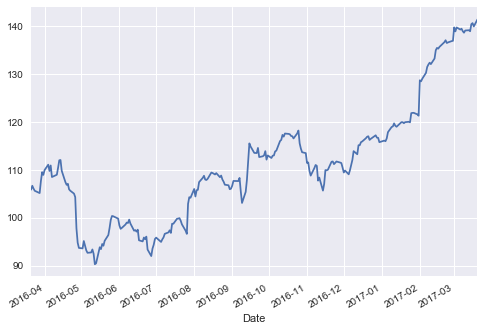

In [18]:
aapl_df['Close'].plot()

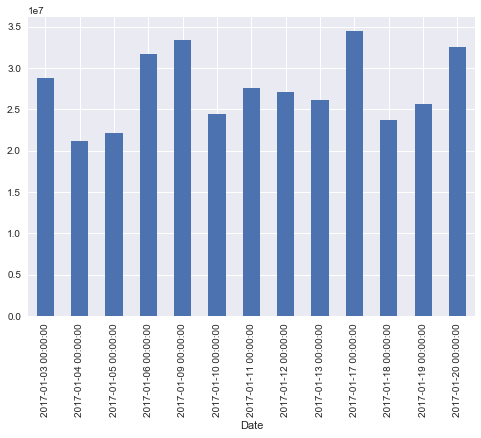

In [19]:
aapl_df.loc['2017-01':'2017-01-20', 'Volume'].plot(kind='bar')

Let's load our other files and merge them all together. To merge, we'll use pandas' `merge` method,
which can merge to DataFrames together by matching either on one or multiple columns, or on the index as
we'll do in this case.

When merging datases that have the same column names, it is better to specify the suffixes to use
in the new merged dataset.

In [20]:
msft_df = pd.read_csv('data/MSFT.csv', parse_dates=['Date']).set_index('Date')
goog_df = pd.read_csv('data/GOOG.csv', parse_dates=['Date']).set_index('Date')
sp500_df = pd.read_csv('data/SP500.csv', parse_dates=['Date']).set_index('Date')

In [21]:
merged1_df = pd.merge(aapl_df, msft_df, left_index=True, right_index=True,
                      suffixes=('_AAPL', '_MSFT'))

merged2_df = pd.merge(goog_df, sp500_df, left_index=True, right_index=True,
                      suffixes=('_GOOG', '_SP500'))
# There are no name clashes left, so no noeed for suffixes.
merged_df = pd.merge(merged1_df, merged2_df, left_index=True, right_index=True)

In [22]:
merged_df.head(5)

,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Volume_AAPL,Adj Close_AAPL,Open_MSFT,High_MSFT,Low_MSFT,Close_MSFT,...,Low_GOOG,Close_GOOG,Volume_GOOG,Adj Close_GOOG,Open_SP500,High_SP500,Low_SP500,Close_SP500,Volume_SP500,Adj Close_SP500
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-20,140.399994,141.500000,140.229996,141.460007,20213100,141.460007,64.910004,65.180000,64.720001,64.930000,...,845.150024,848.400024,1190300,848.400024,2378.239990,2379.550049,2369.659912,2373.469971,3054930000,2373.469971
2017-03-17,141.000000,141.000000,139.889999,139.990005,43597400,139.990005,64.910004,65.239998,64.680000,64.870003,...,847.109985,852.119995,1712300,852.119995,2383.709961,2385.709961,2377.639893,2378.250000,5178040000,2378.250000
2017-03-16,140.720001,141.020004,140.259995,140.690002,19132500,140.690002,64.750000,64.760002,64.300003,64.639999,...,846.130005,848.780029,970400,848.780029,2387.709961,2388.100098,2377.179932,2381.379883,3365660000,2381.379883
2017-03-15,139.410004,140.750000,139.029999,140.460007,25566800,140.460007,64.550003,64.919998,64.250000,64.750000,...,840.770020,847.200012,1379600,847.200012,2370.340088,2390.010010,2368.939941,2385.260010,3906840000,2385.260010
2017-03-14,139.300003,139.649994,138.839996,138.990005,15189700,138.990005,64.529999,64.550003,64.150002,64.410004,...,840.799988,845.619995,779900,845.619995,2368.550049,2368.550049,2358.179932,2365.449951,3172630000,2365.449951


We can plot multiple columns are the same time by selecting a list of columns.

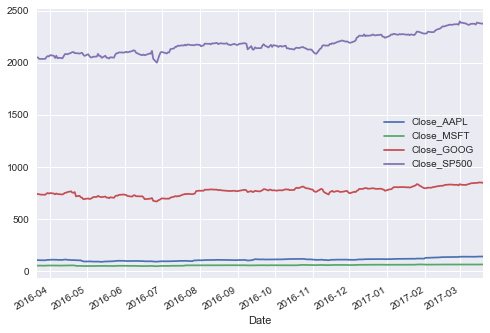

In [23]:
merged_df[['Close_AAPL', 'Close_MSFT', 'Close_GOOG', 'Close_SP500']].plot()

However, looking at prices is not that informative because they are not on the same scale. We usually want to compare returns, but we don't have them in our data. Fortunately, we can easily compute them from daily prices. Before we do so, we'll merge our data in a different way that will be more useful for processing.

First, let's add a new column to our stock datasets with the ticker of the stock.

In [24]:
aapl_df['Ticker'] = 'AAPL'
msft_df['Ticker'] = 'MSFT'
goog_df['Ticker'] = 'GOOG'

In [25]:
concat_df = pd.concat([aapl_df, msft_df, goog_df])
concat_df.head(5)

,Open,High,Low,Close,Volume,Adj Close,Ticker
Date,,,,,,,
2016-03-21,105.930000,107.650002,105.139999,105.910004,35502700,103.717391,AAPL
2016-03-22,105.250000,107.290001,105.209999,106.720001,32444400,104.510620,AAPL
2016-03-23,106.480003,107.070000,105.900002,106.129997,25703500,103.932830,AAPL
2016-03-24,105.470001,106.250000,104.889999,105.669998,26133000,103.482354,AAPL
2016-03-28,106.000000,106.190002,105.059998,105.190002,19411400,103.012296,AAPL


Before we compute returns, we need to make sure that everything is well sorted. To compute returns we'll use the adjusted close which takes into account dividends and splits, and use log-returns (continuously compounded returns) as they are more usefull for computation. Python doesn't have a built-in log function, but the numpy package has one that can be used directly on pandas DataFrames.

In [26]:
# Reset the current index (return to a column)
concat_df = concat_df.reset_index()
# Sort by ticker and date.
concat_df = concat_df.sort_values(['Ticker', 'Date'])
concat_df.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close,Ticker
0,2016-03-21,105.930000,107.650002,105.139999,105.910004,35502700,103.717391,AAPL
1,2016-03-22,105.250000,107.290001,105.209999,106.720001,32444400,104.510620,AAPL
2,2016-03-23,106.480003,107.070000,105.900002,106.129997,25703500,103.932830,AAPL
3,2016-03-24,105.470001,106.250000,104.889999,105.669998,26133000,103.482354,AAPL
4,2016-03-28,106.000000,106.190002,105.059998,105.190002,19411400,103.012296,AAPL


The log return is the difference in log prices.
We can compute it using the `diff()` method, but we want
to do it by ticker, so we use the `groupby()` method for that.

In [27]:
# Compute the log price.
concat_df['LogAdjClose'] = np.log(concat_df['Adj Close'])
# The log return is the difference in log prices.
# We can compute it using the diff() method, but we want
# to do it by ticker, so we use the `groupby` method.
concat_df['LogRet'] = concat_df.groupby('Ticker')['LogAdjClose'].diff()
concat_df.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close,Ticker,LogAdjClose,LogRet
0,2016-03-21,105.930000,107.650002,105.139999,105.910004,35502700,103.717391,AAPL,4.641670,NaN
1,2016-03-22,105.250000,107.290001,105.209999,106.720001,32444400,104.510620,AAPL,4.649289,0.007619
2,2016-03-23,106.480003,107.070000,105.900002,106.129997,25703500,103.932830,AAPL,4.643745,-0.005544
3,2016-03-24,105.470001,106.250000,104.889999,105.669998,26133000,103.482354,AAPL,4.639401,-0.004344
4,2016-03-28,106.000000,106.190002,105.059998,105.190002,19411400,103.012296,AAPL,4.634848,-0.004553


Alternatively, we could compute the lag first and then do the difference.

In [28]:

# Alternatively, we could compute the lag first and then do the difference.

In [29]:
concat_df = concat_df.set_index('Date')

Ticker
AAPL    Axes(0.125,0.2;0.775x0.68)
GOOG    Axes(0.125,0.2;0.775x0.68)
MSFT    Axes(0.125,0.2;0.775x0.68)
Name: LogRet, dtype: object

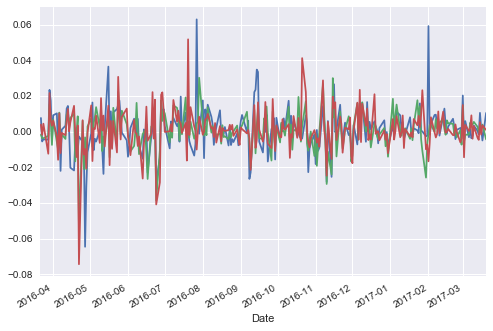

In [30]:
concat_df.groupby('Ticker')['LogRet'].plot()

Now that is better, but even returns don't look that nice. We usually want to look at cumulative returns over the period. Before we do, we can have a look at the distribution of log returns.

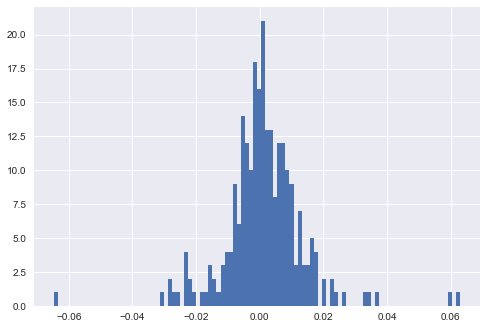

In [31]:
concat_df.loc[concat_df.Ticker=='AAPL', 'LogRet'].hist(bins=100)

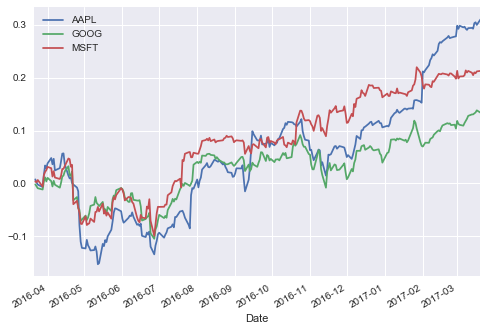

In [32]:
fig, ax = plt.subplots(1)
concat_df['CumRet'] = concat_df.groupby('Ticker')['LogRet'].cumsum()
concat_df.groupby('Ticker')['CumRet'].plot(ax=ax)
ax.legend(labels=['AAPL','GOOG','MSFT'])

In [33]:
concat_df.groupby('Ticker')['LogRet', 'CumRet'].describe()

LogRet      CumRet
Ticker                              
AAPL   count  251.000000  251.000000
       mean     0.001236    0.053975
       std      0.012437    0.114541
       min     -0.064622   -0.152939
       25%     -0.004308   -0.034767
       50%      0.000901    0.048021
       75%      0.007314    0.112460
       max      0.062940    0.310347
GOOG   count  251.000000  251.000000
       mean     0.000533    0.030369
       std      0.010191    0.053946
       min     -0.054645   -0.104793
       25%     -0.004031   -0.008118
       50%      0.000566    0.038516
       75%      0.005845    0.068758
       max      0.030213    0.138257
MSFT   count  251.000000  251.000000
       mean     0.000848    0.078834
       std      0.011702    0.089063
       min     -0.074411   -0.099299
       25%     -0.004454    0.005608
       50%      0.000311    0.080665
       75%      0.006166    0.165490
       max      0.051755    0.219844

A quicker way to get the same result is to set the index to a MultiIndex (two levels),
then *unstack* level 1 (the ticker), and plot the result.

In [34]:
unstack_df = concat_df.reset_index().set_index(['Date', 'Ticker']).unstack(level=1)
unstack_df.head(5)

Open                               High              \
Ticker            AAPL        GOOG       MSFT        AAPL        GOOG   
Date                                                                    
2016-03-21  105.930000  736.500000  53.250000  107.650002  742.500000   
2016-03-22  105.250000  737.460022  53.610001  107.290001  745.000000   
2016-03-23  106.480003  742.359985  54.110001  107.070000  745.719971   
2016-03-24  105.470001  732.010010  53.840000  106.250000  737.747009   
2016-03-28  106.000000  736.789978  54.209999  106.190002  738.989990   

                              Low                              Close  \
Ticker           MSFT        AAPL        GOOG       MSFT        AAPL   
Date                                                                   
2016-03-21  53.930000  105.139999  733.515991  52.930000  105.910004   
2016-03-22  54.250000  105.209999  737.460022  53.459999  106.720001   
2016-03-23  54.240002  105.900002  736.150024  53.740002  106.129997   
2016-03-24  54.330002  104.889999  731.000000  53.730000  105.669998   
2016-03-28  54.290001  105.059998  732.500000  53.330002  105.190002   

              ...     Adj Close LogAdjClose                        LogRet  \
Ticker        ...          MSFT        AAPL      GOOG      MSFT      AAPL   
Date          ...                                                           
2016-03-21    ...     52.479765    4.641670  6.609471  3.960428       NaN   
2016-03-22    ...     52.684382    4.649289  6.607663  3.964319  0.007619   
2016-03-23    ...     52.586946    4.643745  6.604025  3.962468 -0.005544   
2016-03-24    ...     52.820794    4.639401  6.600279  3.966905 -0.004344   
2016-03-28    ...     52.167966    4.634848  6.597869  3.954469 -0.004553   

                                  CumRet                      
Ticker          GOOG      MSFT      AAPL      GOOG      MSFT  
Date                                                          
2016-03-21       NaN       NaN       NaN       NaN       NaN  
2016-03-22 -0.001807  0.003891  0.007619 -0.001807  0.003891  
2016-03-23 -0.003638 -0.001851  0.002075 -0.005445  0.002040  
2016-03-24 -0.003747  0.004437 -0.002269 -0.009192  0.006477  
2016-03-28 -0.002410 -0.012436 -0.006821 -0.011602 -0.005959  

[5 rows x 27 columns]

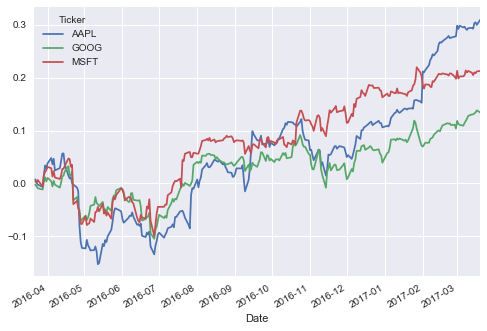

In [35]:
unstack_df['CumRet'].plot()

Those returns sure seem to be correlated.

In [36]:
unstack_df['LogRet'].corr()

Ticker,AAPL,GOOG,MSFT
Ticker,,,
AAPL,1.000000,0.422536,0.314417
GOOG,0.422536,1.000000,0.691472
MSFT,0.314417,0.691472,1.000000


We can smooth those returns out by taking the rolling mean, for example over the last 10 observations. Or would we prefer the last 2 weeks?

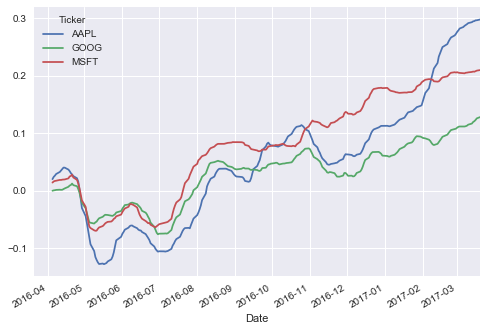

In [37]:
rolling_mean = unstack_df['CumRet'].rolling(10).mean()
rolling_mean.plot()

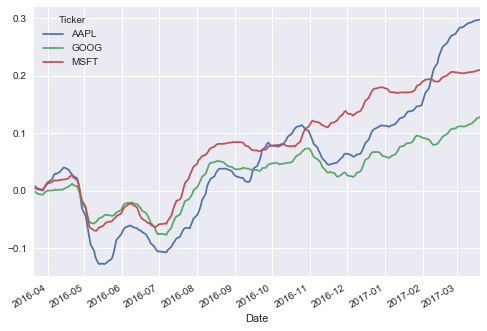

In [38]:
rolling_mean = unstack_df['CumRet'].rolling('14d').mean()
rolling_mean.plot()

Now, say we wanted to get weekly returns. Easy, we can resample!

In [39]:
weekly_ret_df = unstack_df['LogRet'].resample('W').sum()
weekly_ret_df.head(5)

Ticker,AAPL,GOOG,MSFT
Date,,,
2016-03-27,-0.002269,-0.009192,0.006477
2016-04-03,0.040068,0.019675,0.024778
2016-04-10,-0.012166,-0.014452,-0.020912
2016-04-17,0.010892,0.026501,0.022350
2016-04-24,-0.038700,-0.054460,-0.072078


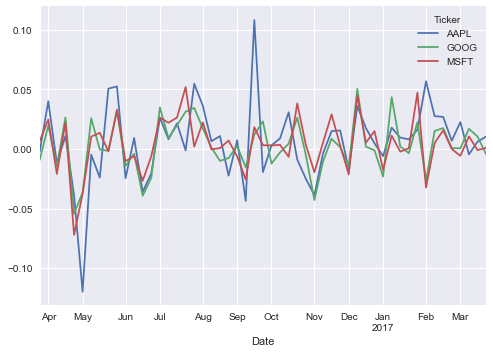

In [40]:
weekly_ret_df.plot()

For weekly cumulative returns, we could recompute them, or just resample using `last()`.

In [41]:
weekly_cumret_df = unstack_df['CumRet'].resample('W').last()
weekly_cumret_df.head(5)

Ticker,AAPL,GOOG,MSFT
Date,,,
2016-03-27,-0.002269,-0.009192,0.006477
2016-04-03,0.037800,0.010483,0.031255
2016-04-10,0.025634,-0.003970,0.010344
2016-04-17,0.036526,0.022531,0.032694
2016-04-24,-0.002174,-0.031929,-0.039384


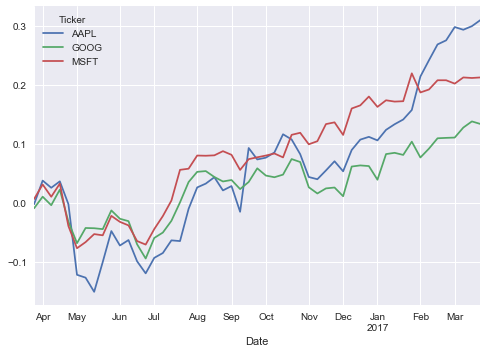

In [42]:
weekly_cumret_df.plot()